# Jacob's notebook wuup

In [7]:
from matplotlib import pyplot as plt
import numpy as np

## Pixel intensity distribution

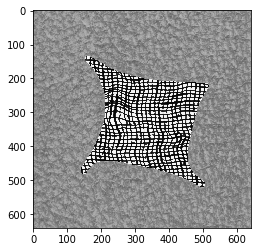

In [11]:
fname = "data/simple_test.png"
img = plt.imread(fname)
plt.imshow(img, cmap='gray')

In [12]:
def init_circle_curve(n_points, center, radius):
    th = np.arange(0,1,1/n_points)*(2*np.pi)
    snake = np.array([np.cos(th), np.sin(th)]).transpose()*radius + center
    return snake

def plot_snake(snake,col='blue'):
    plt.plot(*zip(*np.flip(snake,axis=1)),'.-',linewidth=1,color=col)

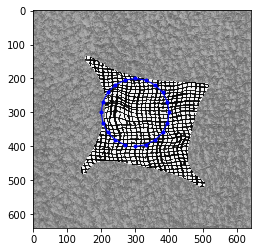

In [13]:
snake = init_circle_curve(20,(300,300),100)
plt.imshow(img, cmap='gray')
plot_snake(snake)

Find mask that describes the inner part of the snake:

In [15]:
def curve_normals(snake):
    a = np.zeros(snake.shape)
    s_prev = np.roll(snake,  1, axis=0) # prev
    s_next = np.roll(snake, -1, axis=0) # next
    a[:,0] =   s_next[:,1] - s_prev[:,1]
    a[:,1] = -(s_next[:,0] - s_prev[:,0])
    a = a / np.linalg.norm(a, axis=1)[:,None]
    return a

In [17]:
from collections import deque

def pixels_between_points(p1, p2):
    vec = p2-p1
    l = np.linalg.norm(vec)
    p = np.arange(l)/l
    return (p1+p[:,None]*vec).astype(int)

def curve_contour(snake, mask_shape):
    mask = np.zeros(mask_shape).astype(bool)
    p = snake[-1,]
    for i in range(len(snake)):
        idx = pixels_between_points(p, snake[i,])
        p = snake[i,]
        mask[idx[:,0],idx[:,1]] = True
    return mask

def fill_contour(mask, seed):
    queue = deque([seed])
    while(queue):
        pt = queue.popleft()
        if(mask[pt[0],pt[1]] != True):
            mask[pt[0],pt[1]] = True
            # add neighbours to queue
            queue.append( (pt[0] - 1, pt[1]) )
            queue.append( (pt[0] + 1, pt[1]) )
            queue.append( (pt[0], pt[1] - 1) )
            queue.append( (pt[0], pt[1] + 1) )           
        
def snake_enclosed(snake, normals, img_shape):
    mask = curve_contour(snake, img_shape)
    p0 = tuple((snake[0,]-2*normals[0,]).astype(int))
    fill_contour(mask,p0)
    return mask.astype(bool)

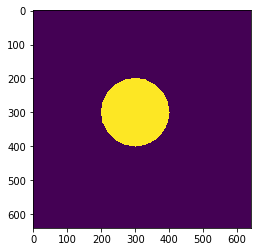

In [18]:
normals = curve_normals(snake)
mask = snake_enclosed(snake, normals, img.shape)
plt.imshow(mask)

Find which pixels intensities are found inside and outside the snake

In [42]:
all_unique = np.unique(img.flatten()) # array containing each different pixel value

count_inside = np.zeros_like(all_unique)
count_outside = np.zeros_like(all_unique)
count_total = np.zeros_like(all_unique)
for i,x in enumerate(all_unique):
    count_inside[i] = (img[mask]==x).sum()
    count_outside[i] = (img[~mask]==x).sum()
    count_total[i] = count_inside[i]+count_outside[i];

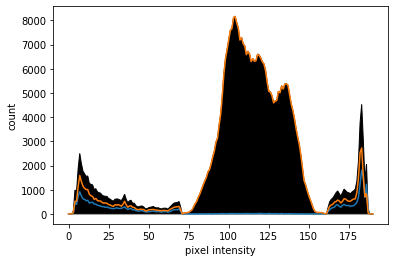

In [56]:
plt.fill(count_total, color='black')
plt.plot(count_inside)
plt.plot(count_outside)
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

Calculate probalility of being inside contour based on pixel intensity

In [43]:
pixel_probs = count_inside/count_total

Text(0, 0.5, 'probability of being inside snake')

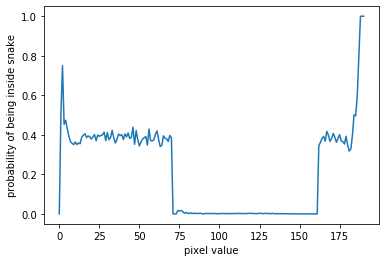

In [57]:
plt.plot(pixel_probs)
plt.xlabel('pixel value')
plt.ylabel('probability of being inside snake')

Plot as probability image

In [48]:
prob_img = np.zeros_like(img)
for i,x in enumerate(all_unique):
    prob_img[img==x] = pixel_probs[i]

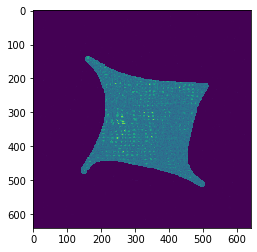

In [50]:
plt.imshow(prob_img)